In [3]:
import metapypulation.subpopulation
import metapypulation.individual
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from metapypulation.metapopulation import Metapopulation


In [2]:

migrations = np.genfromtxt('./configs/island_model.csv', delimiter=',')

migrations = migrations

metapop = Metapopulation(4, "axelrod_interaction", migrations, carrying_capacities=1000)
metapop.populate()

In [3]:
for t in range(200000):
    if t%100000 == 0:
        print(f"Gen {t}!")
        for subpopulation in metapop.subpopulations:
            print(f"The current size of pop {subpopulation.id} is {subpopulation.get_population_size()}")
            sub_id = []
            for ind in subpopulation.population.individuals:
                sub_id.append(ind.original_deme_id)
            indexes, counts = np.unique(sub_id, return_counts=True)
            print(f"The current deme index present in population {subpopulation.id} are {indexes} with {counts} counts.")
    
    metapop.migrate()
    metapop.make_interact()

Gen 0!
The current size of pop 0 is 100
The current deme index present in population 0 are [0] with [100] counts.
The current size of pop 1 is 100
The current deme index present in population 1 are [1] with [100] counts.
The current size of pop 2 is 100
The current deme index present in population 2 are [2] with [100] counts.
The current size of pop 3 is 100
The current deme index present in population 3 are [3] with [100] counts.
Gen 100000!
The current size of pop 0 is 103
The current deme index present in population 0 are [0 1 2 3] with [36 24 18 25] counts.
The current size of pop 1 is 102
The current deme index present in population 1 are [0 1 2 3] with [22 22 26 32] counts.
The current size of pop 2 is 95
The current deme index present in population 2 are [0 1 2 3] with [23 23 25 24] counts.
The current size of pop 3 is 100
The current deme index present in population 3 are [0 1 2 3] with [19 31 31 19] counts.


In [4]:
for individual in metapop.subpopulations[0].population.individuals:
    print(individual.features)

[10  5  4  5 10]
[10  5  4  5 10]
[10  5  4  5  8]
[10  5  4  5 10]
[10  5  4  5  8]
[10  5  4  8  8]
[10  5  4  8  8]
[10  5  4  5 10]
[10  5  4  5  8]
[10  5  4  5  8]
[10  5  4  8  8]
[10  5  4  5  8]
[10  5  4  5  8]
[10  5  4  8  8]
[10  5  4  5 10]
[10  5  4  5 10]
[10  5  4  5  8]
[10  5  4  5 10]
[10  5  4  5  8]
[10  5  4  5 10]
[10  5  4  5  8]
[10  5  4  5  8]
[10  5  4  5  8]
[10  5  4  5 10]
[10  5  4  5  8]
[10  5  4  5  8]
[10  5  4  5 10]
[10  5  4  5  8]
[10  5  4  5 10]
[10  5  4  5 10]
[10  5  4  2  8]
[10  5  4  5 10]
[10  5  4  5 10]
[10  5  4  5 10]
[10  5  4  2 10]
[10  5  4  5 10]
[10  5  4  5  8]
[10  5  4  5 10]
[10  5  4  5  8]
[10  5  4  5 10]
[10  5  4  5  8]
[10  5  4  5 10]
[10  5  4  5  8]
[10  5  4  5 10]
[10  5  4  5 10]
[10  5  4  5 10]
[10  5  4  5  8]
[10  5  4  5 10]
[10  5  4  2  8]
[10  5  4  5  8]
[10  5  4  8  8]
[10  5  4  5 10]
[10  5  4  5 10]
[10  5  4  5 10]
[10  5  4  8 10]
[10  5  4  5  8]
[10  5  4  8 10]
[10  5  4  2 10]
[10  5  4  5  

In [31]:
df_SS = pd.read_csv("./Outputs/stepping_stone.csv")
df_SS["means"] = df_SS.mean(axis=1)

df_IM = pd.read_csv("./Outputs/island.csv")
df_IM["means"] = df_IM.mean(axis=1)

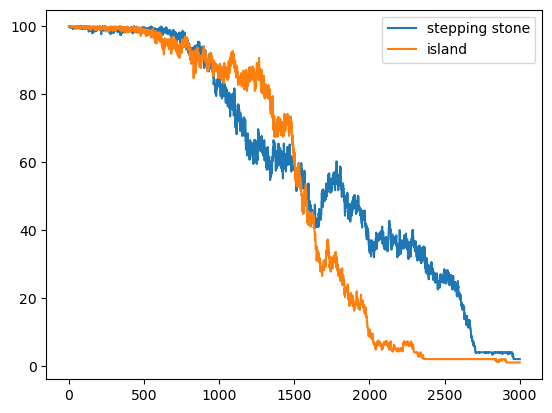

In [34]:
df_SS["means"].plot()
df_IM["means"].plot()
plt.legend(["stepping stone", "island"])
plt.ylab("Different sets of traits")
plt.xlab("Generations (x 1000)")